In [50]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro
from scipy.stats import mannwhitneyu
from scipy.stats import zscore
from scipy.stats import levene

In [34]:
df_hbn = pd.read_csv('../data/HBN.csv')
df_hbn.head()

,Unnamed: 0,id,Enrol_Season,Age,Sex,CGAS-Season,CGAS-Score,Physical-Season,Physical-BMI,Physical-Height,...,PCIAT-PCIAT_18,PCIAT-PCIAT_19,PCIAT-PCIAT_20,PCIAT-PCIAT_Total,SDS-Season,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-Season,PreInt_EduHx-computerinternet_hoursday,sii
0,0,00008ff9,Fall,5,0,Winter,51.0,Fall,16.877316,46.0,...,4.0,2.0,4.0,55.0,NaN,NaN,NaN,Fall,3.0,2.0
1,1,000fd460,Summer,9,0,NaN,NaN,Fall,14.035590,48.0,...,0.0,0.0,0.0,0.0,Fall,46.0,64.0,Summer,0.0,0.0
2,2,00105258,Summer,10,1,Fall,71.0,Fall,16.648696,56.5,...,2.0,1.0,1.0,28.0,Fall,38.0,54.0,Summer,2.0,0.0
3,3,00115b9f,Winter,9,0,Fall,71.0,Summer,18.292347,56.0,...,3.0,4.0,1.0,44.0,Summer,31.0,45.0,Winter,0.0,1.0
4,4,0016bb22,Spring,18,1,Summer,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
df_hypo_sleepdisorder = df_hbn[['BIA-BIA_BMR','SDS-SDS_Total_T']]
df_hypo_sleepdisorder.describe()



,BIA-BIA_BMR,SDS-SDS_Total_T
count,1991.000000,2606.000000
mean,1237.018187,57.763622
std,1872.383246,13.196091
min,813.397000,38.000000
25%,1004.710000,47.000000
50%,1115.380000,55.000000
75%,1310.360000,64.000000
max,83152.200000,100.000000


In [41]:
df_sleepdisorder = df_hypo_sleepdisorder[df_hypo_sleepdisorder['SDS-SDS_Total_T'] > 50]
df_nsleepdisorder = df_hypo_sleepdisorder[df_hypo_sleepdisorder['SDS-SDS_Total_T'] <= 50]
df_sleepdisorder.describe()

,BIA-BIA_BMR,SDS-SDS_Total_T
count,588.000000,920.000000
mean,1163.923031,45.373913
std,244.189291,3.419743
min,813.397000,38.000000
25%,1007.720000,42.000000
50%,1097.815000,46.000000
75%,1267.847500,49.000000
max,3079.990000,50.000000


In [43]:
df_sleepdisorder = df_sleepdisorder.dropna()
df_nsleepdisorder = df_nsleepdisorder.dropna()
df_sleepdisorder.describe()

,BIA-BIA_BMR,SDS-SDS_Total_T
count,1070.000000,1070.000000
mean,1269.202493,64.582243
std,2539.031655,11.656218
min,830.308000,51.000000
25%,1012.907500,55.000000
50%,1116.305000,62.000000
75%,1287.627500,71.000000
max,83152.200000,100.000000


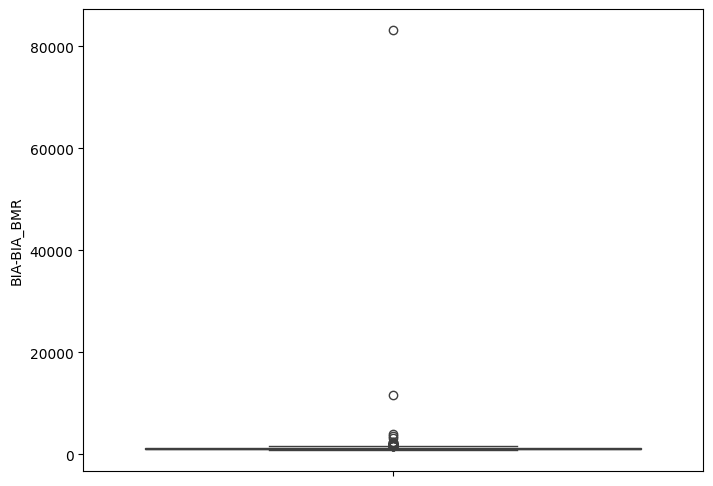

In [44]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_sleepdisorder['BIA-BIA_BMR'])
plt.show()

In [45]:
df_test = df_sleepdisorder.copy()
df_test['Z-Score'] = zscore(df_test['BIA-BIA_BMR'])


outliers = df_test[(df_test['Z-Score'] > 3) | (df_test['Z-Score'] < -3)]
print(outliers)

      BIA-BIA_BMR  SDS-SDS_Total_T    Z-Score
3205      83152.2             51.0  32.264776
3511      11540.8             67.0   4.047370


,BIA-BIA_BMR,SDS-SDS_Total_T,Z-Score
1,936.656,64.0,-0.131035
5,1330.970,56.0,0.024339
18,1003.070,55.0,-0.104866
22,1551.200,73.0,0.111117
27,950.847,55.0,-0.125443
...,...,...,...
3946,1541.270,71.0,0.107204
3952,1719.310,90.0,0.177358
3953,1035.270,58.0,-0.092178
3954,966.287,67.0,-0.119359


In [46]:
df_sleepdisorder = df_sleepdisorder.drop([3205, 3511])


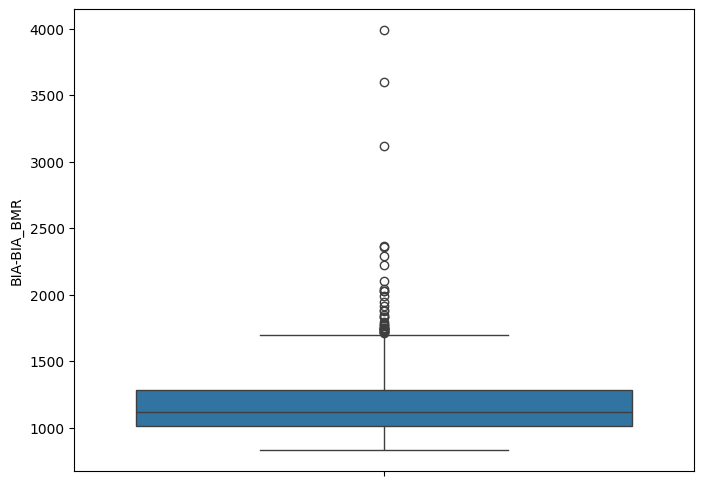

In [47]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_sleepdisorder['BIA-BIA_BMR'])
plt.show()

In [53]:
stat1, p1 = shapiro(df_sleepdisorder['BIA-BIA_BMR'])
stat2, p2 = shapiro(df_nsleepdisorder['BIA-BIA_BMR'])

print(f"P-value for group with disorder: {p1}")
print(f"P-value for group without disorder: {p2}")

P-value for group with disorder: 3.367083681664224e-35
P-value for group without disorder: 3.252034581223183e-27


In [52]:
stat, p = levene(df_sleepdisorder['BIA-BIA_BMR'], df_nsleepdisorder['BIA-BIA_BMR'])
print(f"P-value for equality of variances: {p}")

P-value for equality of variances: 0.19776435008352047


In [55]:
stat, p = mannwhitneyu(df_sleepdisorder['BIA-BIA_BMR'], df_nsleepdisorder['BIA-BIA_BMR'])
print(f"P-value: {p}")

P-value: 0.15615863684775955
